In [ ]:
#untuk membaca file
import io

#untuk visualisasi
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings("ignore")

# for basic mathematics operation 
import numpy as np
import pandas as pd
from pandas import plotting


In [ ]:
#untuk mengunggah file dari drive lokal, tulis kode berikut di sel dan jalankan:
from google.colab import files

uploaded= files.upload()
df=pd.read_csv(io.BytesIO(uploaded['Mall_Customers.csv']))


Saving Mall_Customers.csv to Mall_Customers (1).csv


## Analisis data eksploratif (EDA) antar variabel

##### 1) Data Understanding

Langkah pertama yang harus dilakukan saat mengolah data yakni data understanding. ketika memulai bermain dengan data maka harus mengetahui tentang data tersebut. beberapa contoh function yang merupakan data understanding dapat dilihat dibawah ini:

- Syntax head() dibawah berfungsi untuk menampilkan 5 baris pertama jika angka tidak ditentukan. Tetapi apabila head(n), n tersebut di isi dengan jumlah berapa banyak baris pertama yang akan ditampilkan

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#cek bentuk dataset -> mengembalikan tuple bentuk (Baris, kolom) dari data
df.shape

(200, 5)

- Syntax dibawah berfungsi untuk mengembalikan label setiap kolom di DataFrame.

In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

- Syntax ***info()*** berfungsi untuk mencetak ringkasan singkat dari DataFrame. Informasi tersebut berisi jumlah kolom, label kolom, tipe data kolom, penggunaan memori, indeks rentang, dan jumlah sel di setiap kolom (nilai bukan nol).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


#### 2) Data Cleaning

Setelah itu langkah kedua yaitu data cleaning. Data cleaning dapat berupa:

- membuang data duplikat
- membuang data yang n/a, blank
- penanganan terhadap outlier akan dibuang atau disimpan
- handle missing data


___________________________________________________________________
___________________________________________________________________

-   Menghitung total dataframe yang bernilai missing menggunakan syntax ***isnull().sum()***

In [ ]:
print("Melihat jumlah missing value")
print(df.isnull().sum())
print("-"*50)
print("TOTAL MISSING VALUES:",df.isnull().sum().sum())

Melihat jumlah missing value
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
--------------------------------------------------
TOTAL MISSING VALUES: 0


> Hasil kode diatas menunjukkan tidak adanya missing value

#### 3) Visualisasi Data

Pada bahasa python, dapat menggunakan statistik deskriptif untuk melihat ringkasan dari data secara keseluruhan, salah satunya adalah dari data frame dengan menggunakan fungsi ***describe()***. Fungsi ini dapat memberikan informasi mengenai nilai rata-rata, standar deviasi dan interquartile range.

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


>> Terdapat 200 pelanggan dalam data ini. Hasil deskripsi diatas menunjukan bahwa pada rata-rata umur pelanggan yaitu 39 th, umur pelanggan paling muda yaitu 18 th sedangkan pelanggan berumur paling tua yakni 70 th.
>> Kemudian rata-rata pendapatan tahunan mall yaitu 61 us dollar, pendapatan mall paling sedikit yaitu 15  us dollar, sedangkan pendapatan paling banyak 137  us dollar.
>> Kemudian untuk total pengeluaran pelanggan rata-rata mengeluarkan 50  us dollar, paling banyak yakni 99  us dollar dan yang paling sedikit 1  us dollar

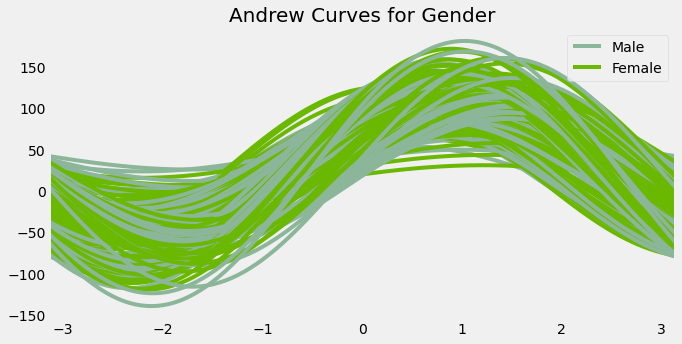

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)

plotting.andrews_curves(df.drop("CustomerID", axis=1), "Gender")
plt.title('Andrew Curves for Gender', fontsize = 20)
plt.show()

* Kurva Andrews di atas mampu merepresentasikan rata-rata, jarak (hingga konstanta), dan varians. Artinya, kurva Andrews menunjukkan fungsi yang berdekatan maka titik data yang sesuai juga akan berdekatan

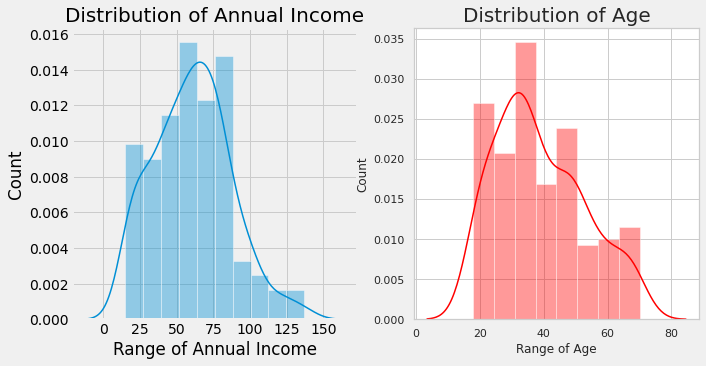

In [ ]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (10, 5)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(df['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(df['Age'], color = 'red')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

> Berikut penjelasan singkat tentang sebaran distribusi Annual Income and Age, berdasarkan plot data yang telah dilakukan

>> Sedikit orang yang memiliki penghasilan lebih dari 100 US Dollars.
>> Kebanyakan orang memiliki penghasilan di kisaran 50-75 US Dollars.
>> Penghasilan terendah di kisaran 20 US Dollars.

> Dari data tersebut juga dapat disimpulkan
>> Kebanyakan pengunjung Mall di kisaran umur 30-35.
>> Kelompok kawula muda lebih sedikit dibandingkan mereka yang berada di Middle aged people.


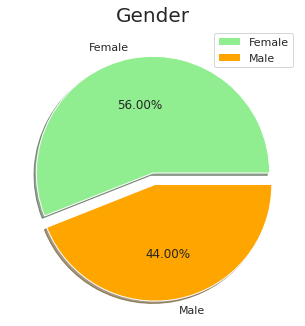

In [ ]:
labels = ['Female', 'Male']
size = df['Gender'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (5, 5)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

> dari diagram pie tersebut terlihat distribusi daei Gender yang mengunjungi mall
>> yang menarik adalah perempuan menguasai perolehan porsi 56% sebagai pengunjung mall dimana laki-laki hanya 44%.

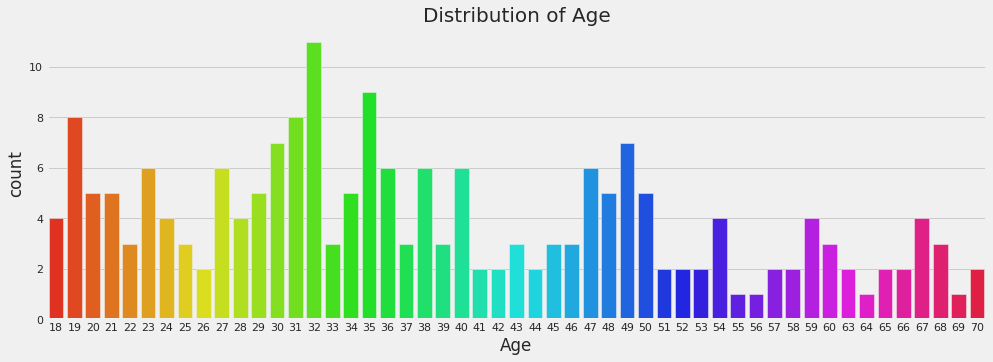

In [ ]:
plt.rcParams['figure.figsize'] = (15, 5)
sns.countplot(df['Age'], palette = 'hsv')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

> Kesimpulan distribusi sebaran Kelompok Age yang mengunjungi Mall.
>> dari grafik pengunjung dengan range umur 27 sampai 39 mendominasi akan tetapi secara pola tidak dapat terlihat dengan jelas.
>> tidak ada jumlah pengunjung yang sama dari umur 18 sampai 67.
>> pengunjung dengan umur 55, 56, 69, 64 paling sedikit
>> pengunjung dengan umur 32 yang sering mengunjungi Mall.

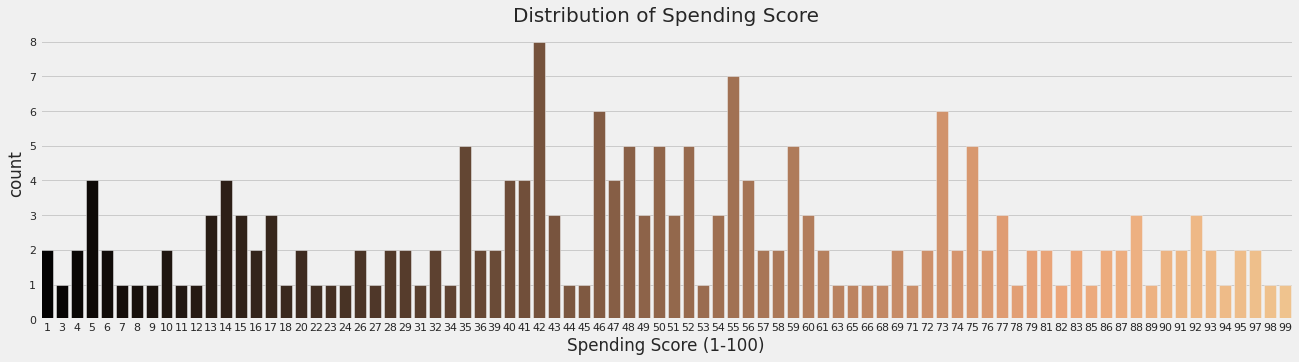

In [ ]:
plt.rcParams['figure.figsize'] = (20, 5)
sns.countplot(df['Spending Score (1-100)'], palette = 'copper')
plt.title('Distribution of Spending Score', fontsize = 20)
plt.show()

> secara umum skor pembelanjaan barang mereka berkisar antara 35-60.

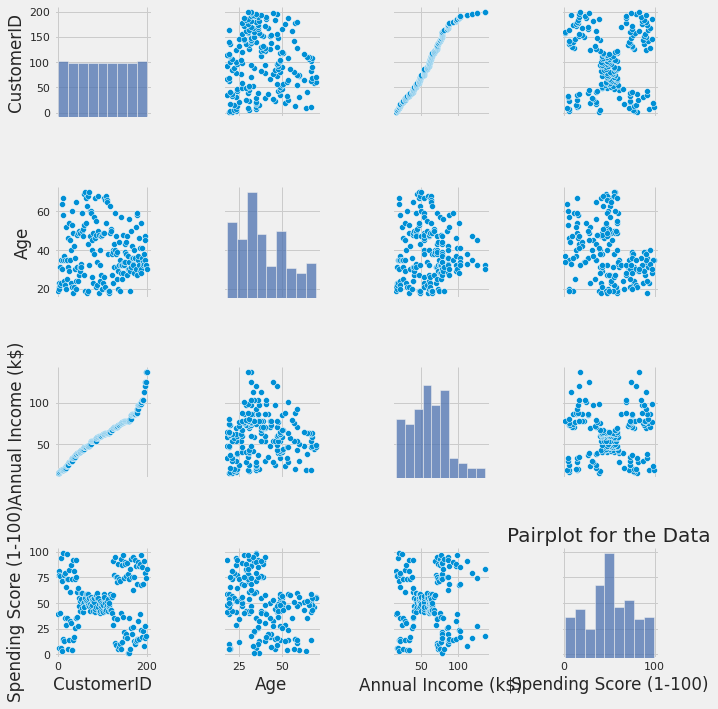

In [ ]:
sns.pairplot(df)
plt.title('Pairplot for the Data', fontsize = 20)
plt.show()

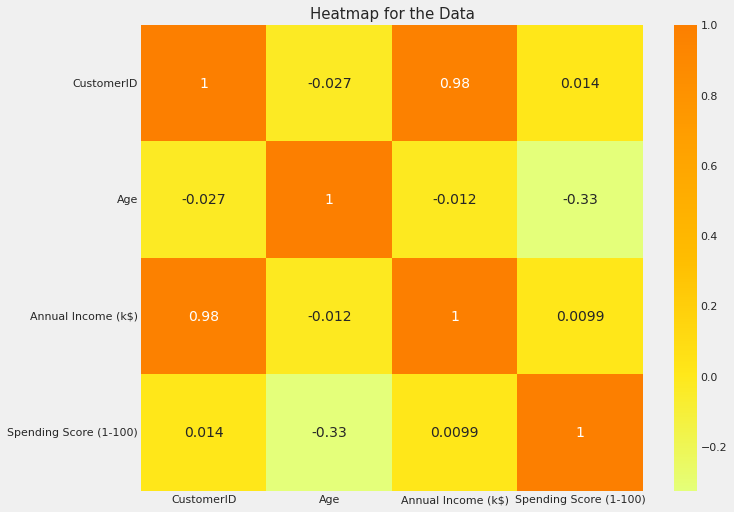

In [ ]:
plt.rcParams['figure.figsize'] = (10, 8)
sns.heatmap(df.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap for the Data', fontsize = 15)
plt.show()

> Grafik di atas menunjukkan hubungan, yang erat hubungannya berwarna semakin orange, sedangkan yang semakin jauh berwarna kuning.

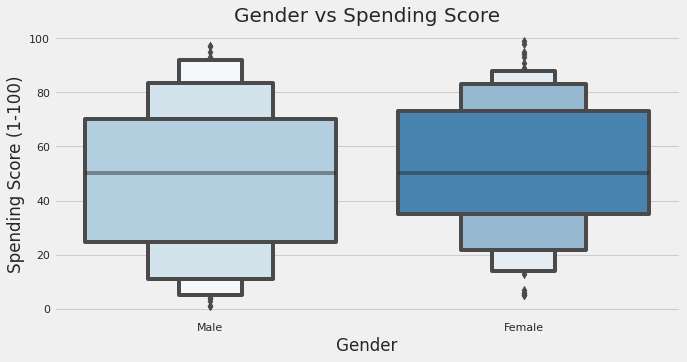

In [ ]:
#  Gender vs Spendscore

plt.rcParams['figure.figsize'] = (10, 5)
sns.boxenplot(df['Gender'], df['Spending Score (1-100)'], palette = 'Blues')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

> Bi-variate Analysis between Gender and Spending Score, 
>> Grafik menunjukkan banyaknya pengeluaran yang dihabiskan oleh perempuan maupun laki-laki. jika dilihat laki-laki ada di kisaran 25-70k USD sedangkan perempuan di kisaran 38-75k USD.

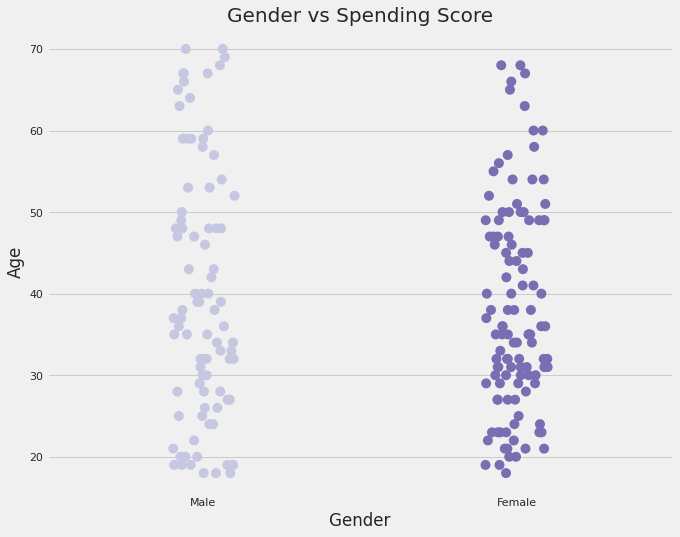

In [ ]:
plt.rcParams['figure.figsize'] = (10, 8)
sns.stripplot(df['Gender'], df['Age'], palette = 'Purples', size = 10)
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

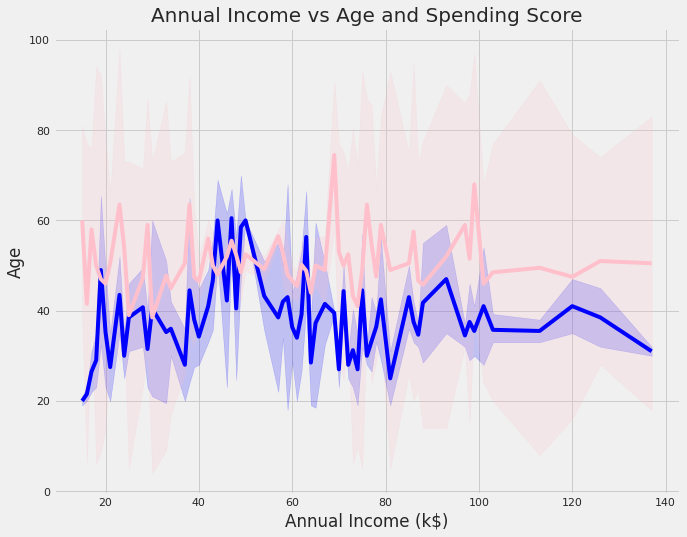

In [ ]:
x = df['Annual Income (k$)']
y = df['Age']
z = df['Spending Score (1-100)']

sns.lineplot(x, y, color = 'blue')
sns.lineplot(x, z, color = 'pink')
plt.title('Annual Income vs Age and Spending Score', fontsize = 20)
plt.show()

> Plot di atas adalah penghasilan dengan umur direpresentasikan dengan garis biru, sedangkan hubungan penghasilan dengan uang yang dibelanjakan ditunjukkan dengan warna pink

## Pembuatan clustering model (model training)

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
x = df.iloc[:, [2, 4]].values

# let's check the shape of x
print(x.shape)

(200, 2)


### Algoritma K-Means menggunakan Elbow Method

Elbow digunakan untuk menentukan jumlah cluster terbaik, tanpa melakukan brute force

> Ada beberapa parameter yang digunakan :
>> **init** merupakan teknik permulaan. Versi standar untuk menerapkan algoritma k-means dengan setting init "random".

>> **n_clusters** adalah jumlah cluster yang akan digunakan.

>> **n_init** adalah jumlah inisiasi yang akan diterapkan.

>> **max_iter** adalah jumlah maksimal iterasi pada algoritma k-means.

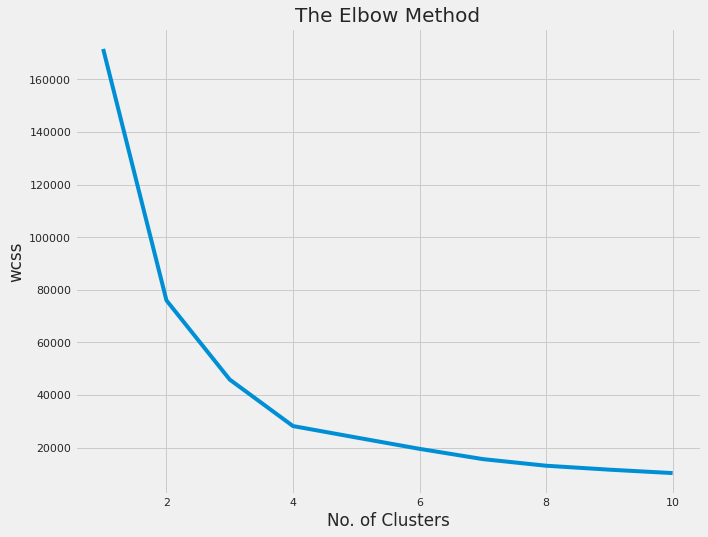

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

> Dari grafik tersebut terlihat bahwa paling maksimal pada jumlah cluster 4

##### Visualisasi Clustering K-Means

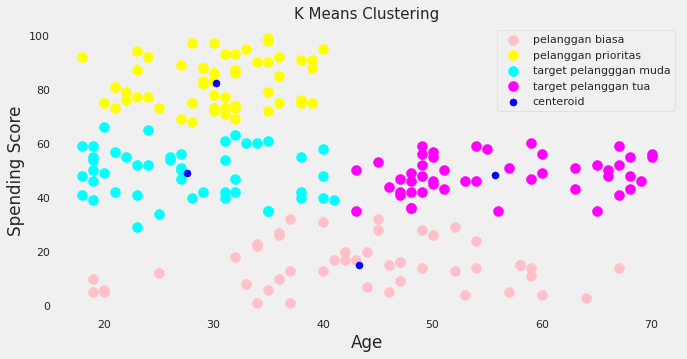

In [ ]:
km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'pelanggan biasa')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'pelanggan prioritas')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target pelangggan muda')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'target pelanggan tua')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 15)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

>> Dari plot sebar di atas, kita dapat memvisualisasikan klaster yang berbeda antara umur dan skor pengeluaran total. Terdapat total 4 cluster yang dibuat pada scatter plot ini dan titik biru merupakan centroid dari 4 cluster tersebut.

### Algoritma Hirarcy menggunakan dendogram


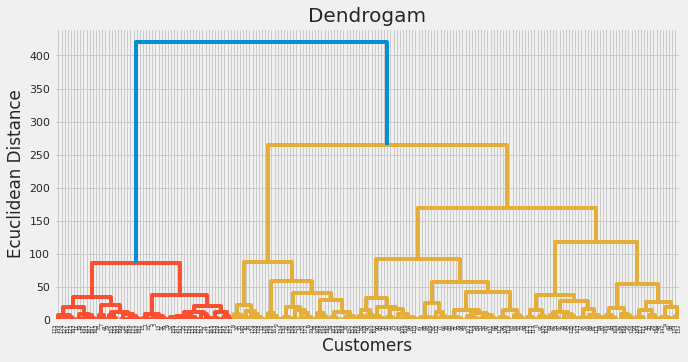

In [ ]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

##### Visualisasi Clustering Hirarcy

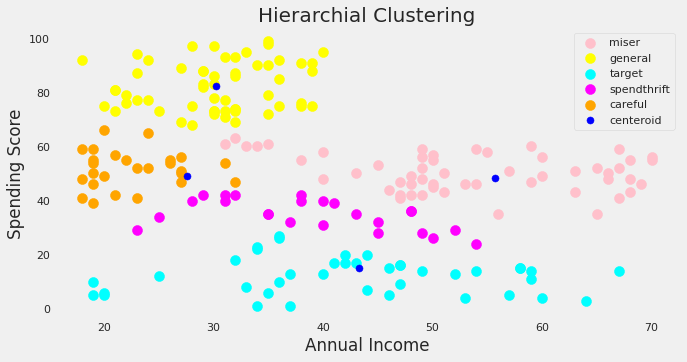

In [ ]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('Hierarchial Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

>> Dari plot sebar di atas, kita dapat memvisualisasikan klaster yang berbeda antara pendapatan tahunan dan skor pengeluaran total. Terdapat total 5 cluster yang dibuat pada scatter plot ini dan titik biru merupakan centroid dari 5 cluster tersebut.

## Tampilan ukuran evaluasi model (Evaluation Metrics)

##### silhouette coefficient k-means

In [ ]:
  SC_kmeans = silhouette_score(x, y_means, metric='euclidean')  # Memanggil data SC_kmeans dengan metric euclidean

print('Silhouette Score model K-means= ', SC_kmeans) # Menampilkan data SC_kmeans

Silhouette Score model K-means=  0.49973941540141753


>> Semakin Silhouette Score mendekati 1, maka model clustering akan semakin bagus.

Berdasarkan Silhouette Score, model K-Means yang telah kita training sudah cukup bagus.

In [ ]:
  SC_hierarchy = silhouette_score(x, y_hc)  # Memanggil data SC_hierarcy

print('Silhouette Score model hierarchy= ', SC_hierarchy) # Menampilkan data SC_hierarcy

Silhouette Score model hierarchy=  0.40374071753059787


>> Semakin Silhouette Score mendekati 1, maka model clustering akan semakin bagus.

>> Berdasarkan Silhouette Score, model Hierarchy yang telah kita training sudah cukup bagus.

### KESIMPULAN:

Data customer mall ini dapat di aplikasikan menggunakan metode K-means dan Hierarchy. Berdasarkan evaluasi model menggunakan Silhouette Score, hasil menunjukkan bahwa kedua model sudah cukup bagus untuk memodelkan data tsb tetapi apabila dibandingkan antar kedua model, maka model k-means paling bagus daripada model hierarcy.